In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\ryanfzhang\Desktop\vgsales.csv')

In [3]:
# Take a look at this dataset 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
# Checking the shape of this dataset
df.shape

(16598, 11)

In [10]:
# Take a look at the missing value of this dataset
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# In terms of the publisher, I would like to drop it
df.dropna(subset=['Publisher'], inplace=True)

In [12]:
# In terms of the Year, I would like to use median to fill the missing values 
df['Year'].fillna(df['Year'].median(),inplace = True)

In [13]:
df['Year']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16540, dtype: float64

In [14]:
# Covert the datatype of 'Year' to int
df['Year'] = df['Year'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [19]:
# Checking the duplicate of this dataset 
df.duplicated().value_counts()

False    16540
dtype: int64

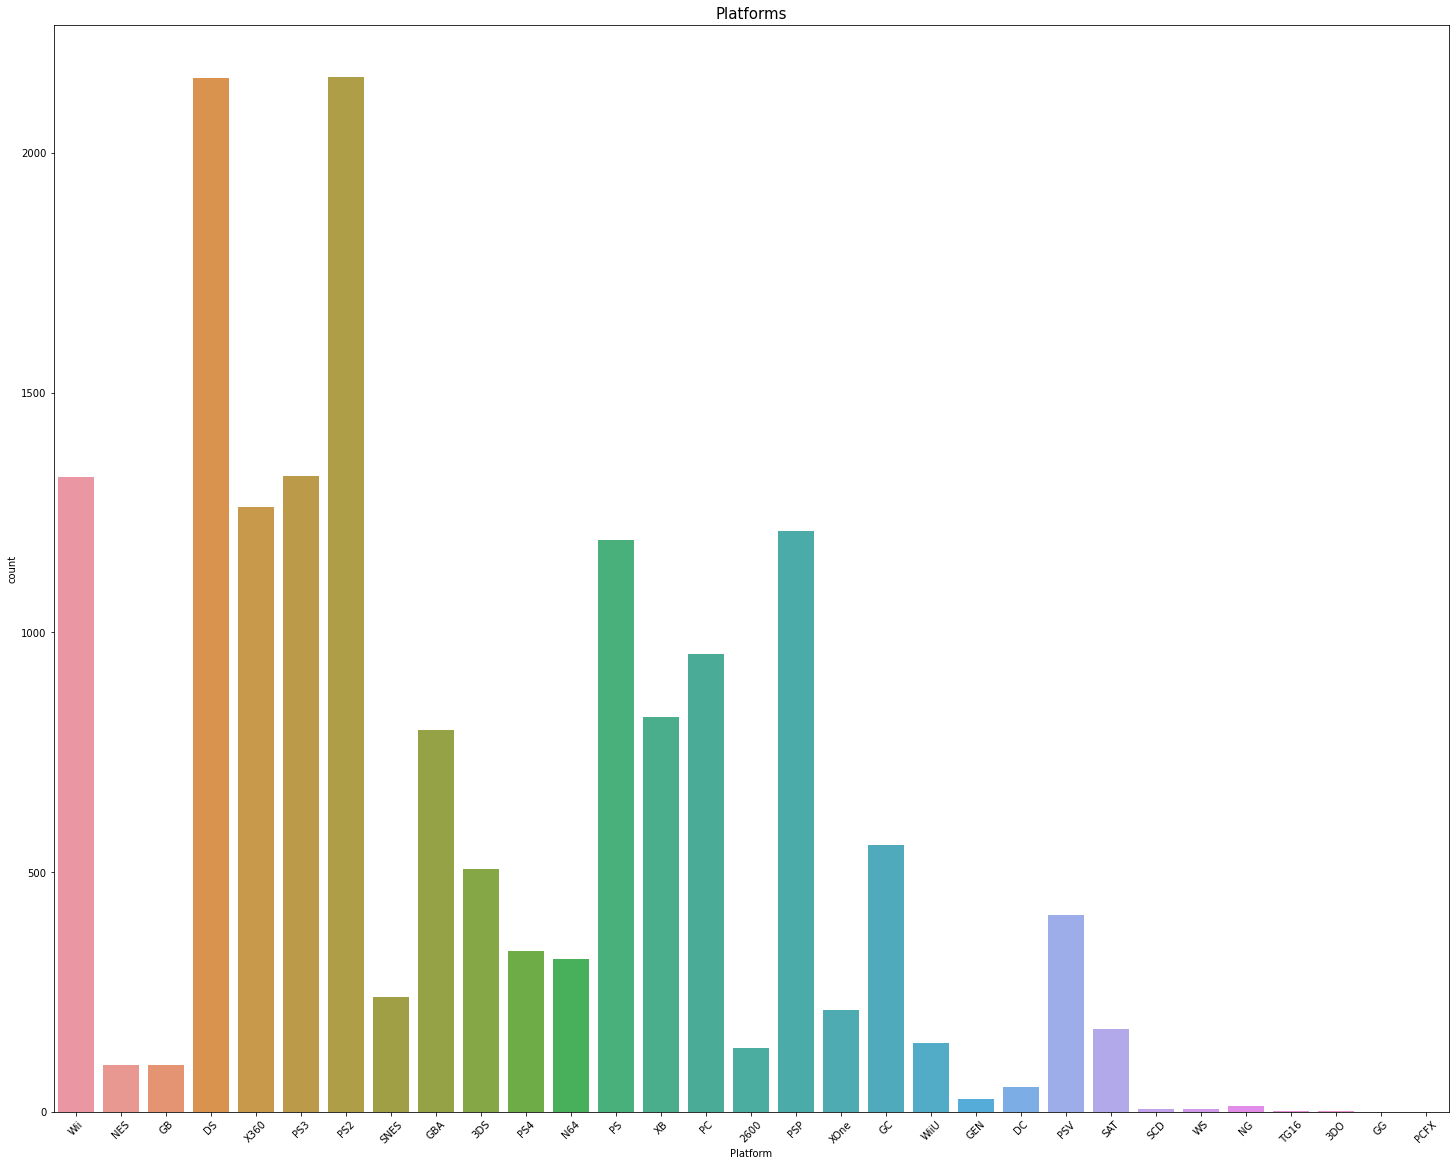

In [20]:
# Data Visualization 

plt.figure(figsize = (25,20))
sns.countplot(df['Platform'])
plt.xticks(rotation=45)
plt.title('Platform', size=15)
plt.show()

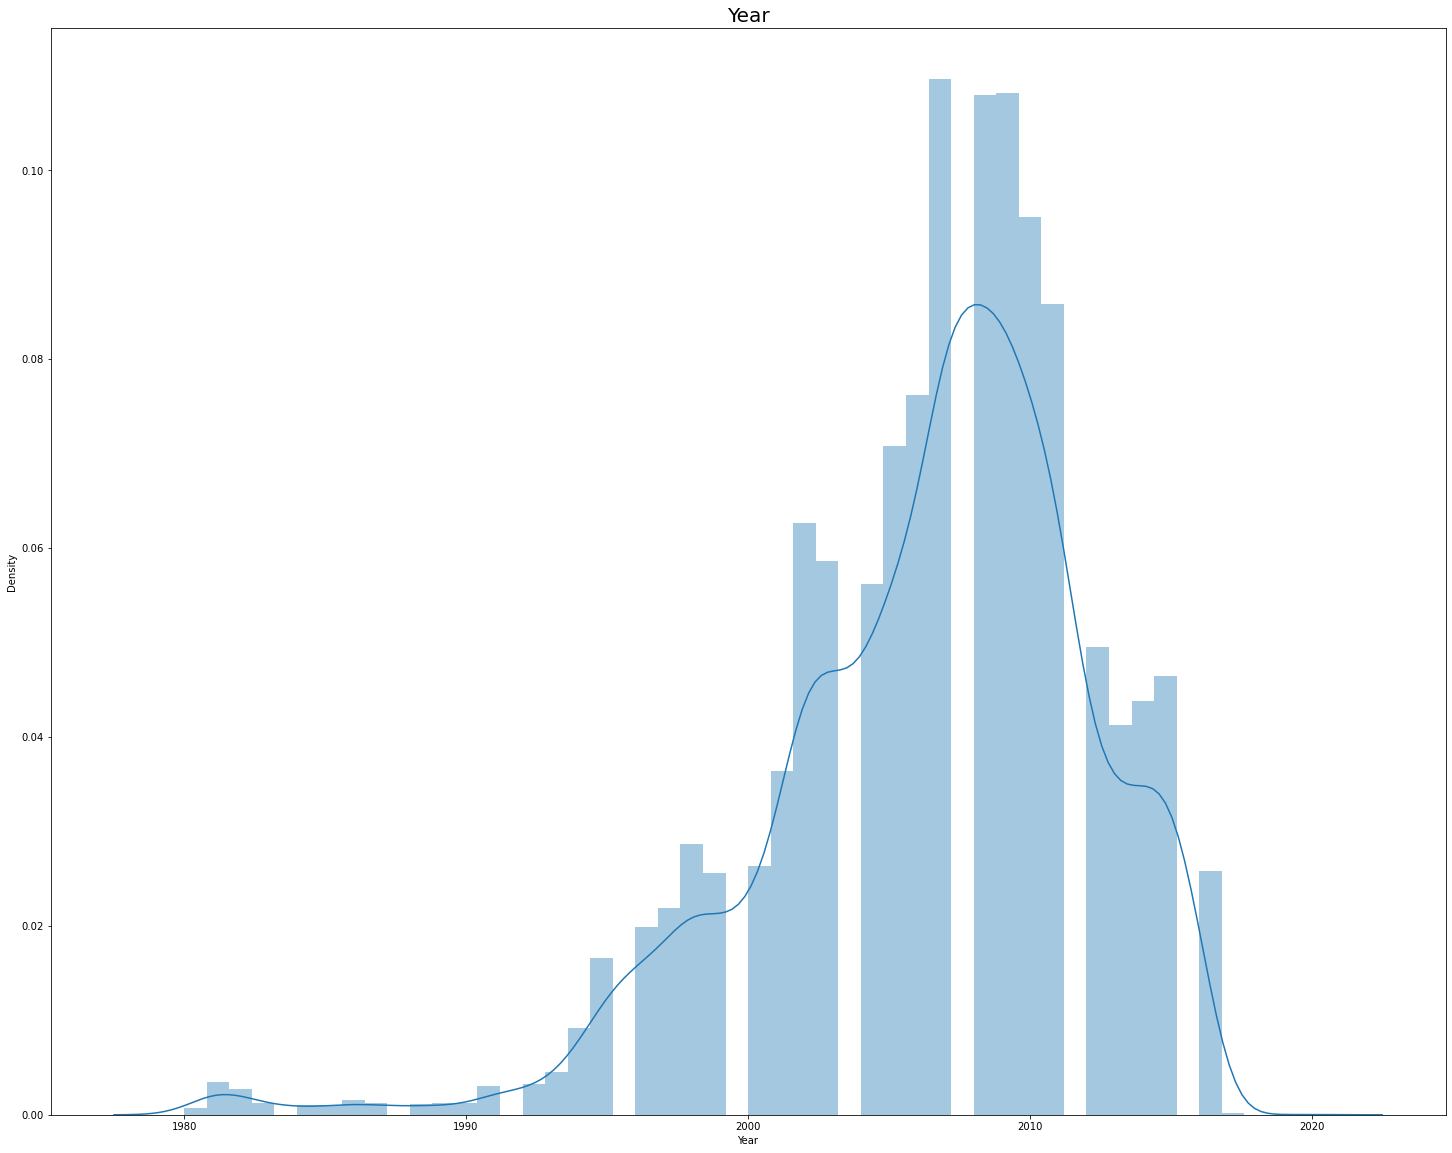

In [21]:
plt.figure(figsize=(25,20))
sns.distplot(df['Year'])
plt.title('Year', size=20)
plt.show()

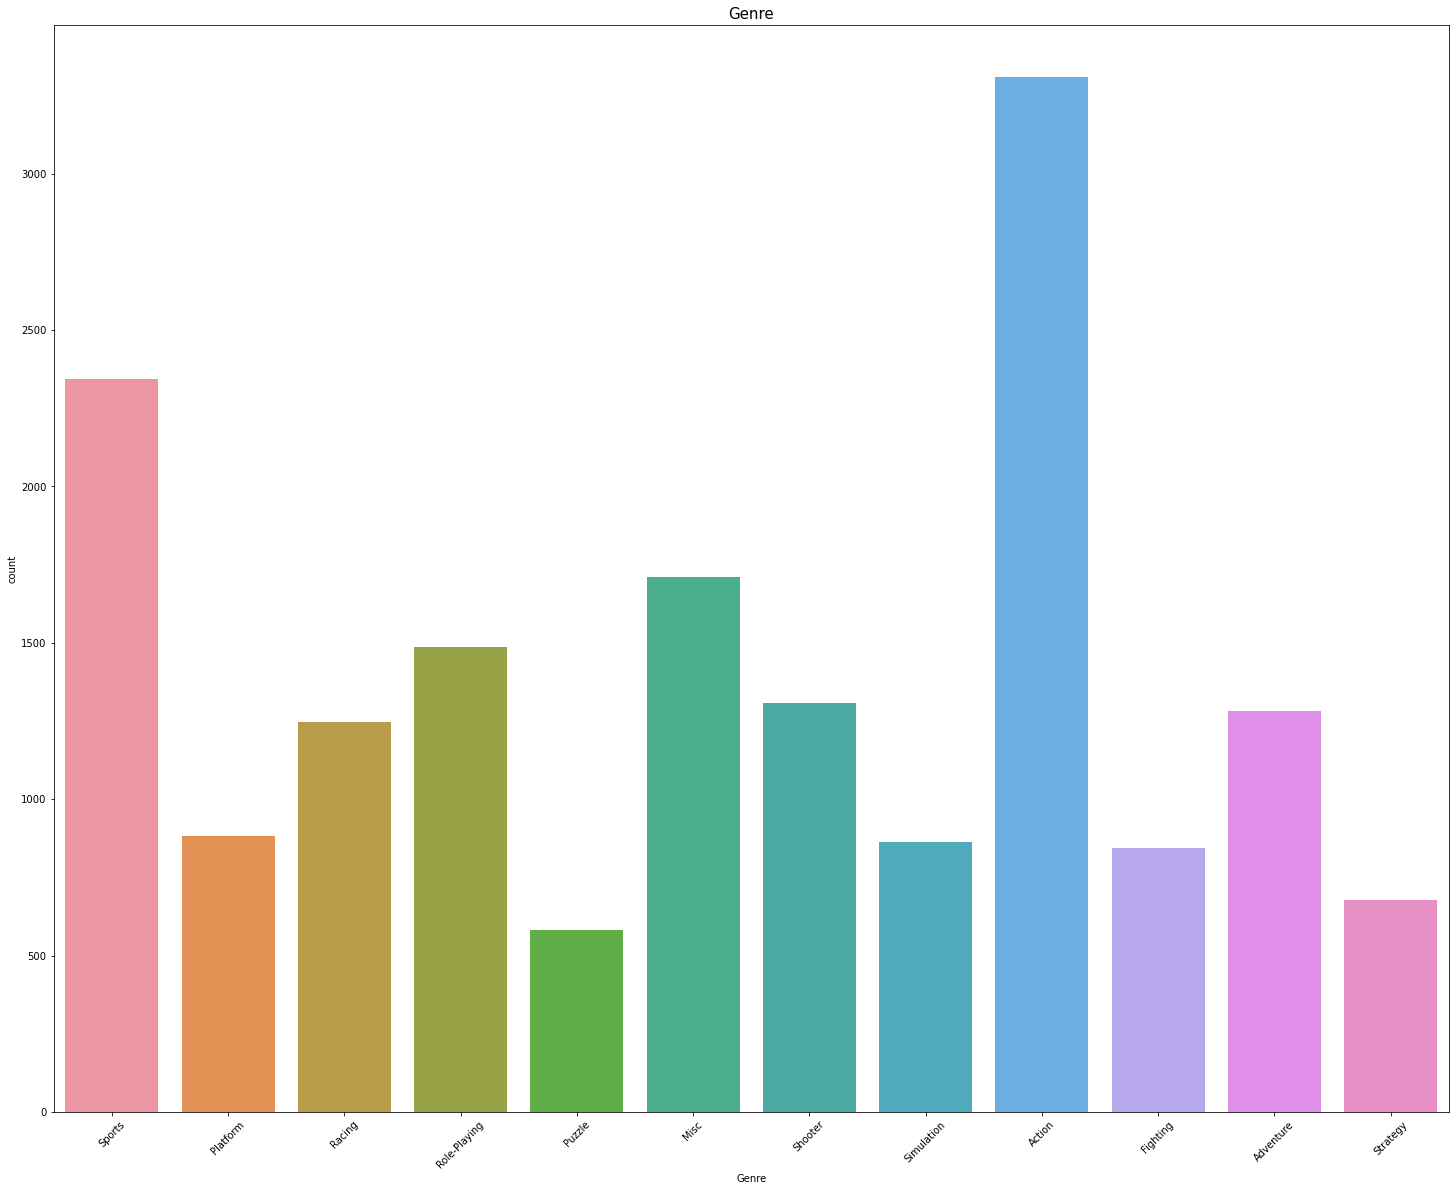

In [22]:
plt.figure(figsize=(25,20))
sns.countplot(df['Genre'])
plt.xticks(rotation=45)
plt.title('Genre', size=15)
plt.show()


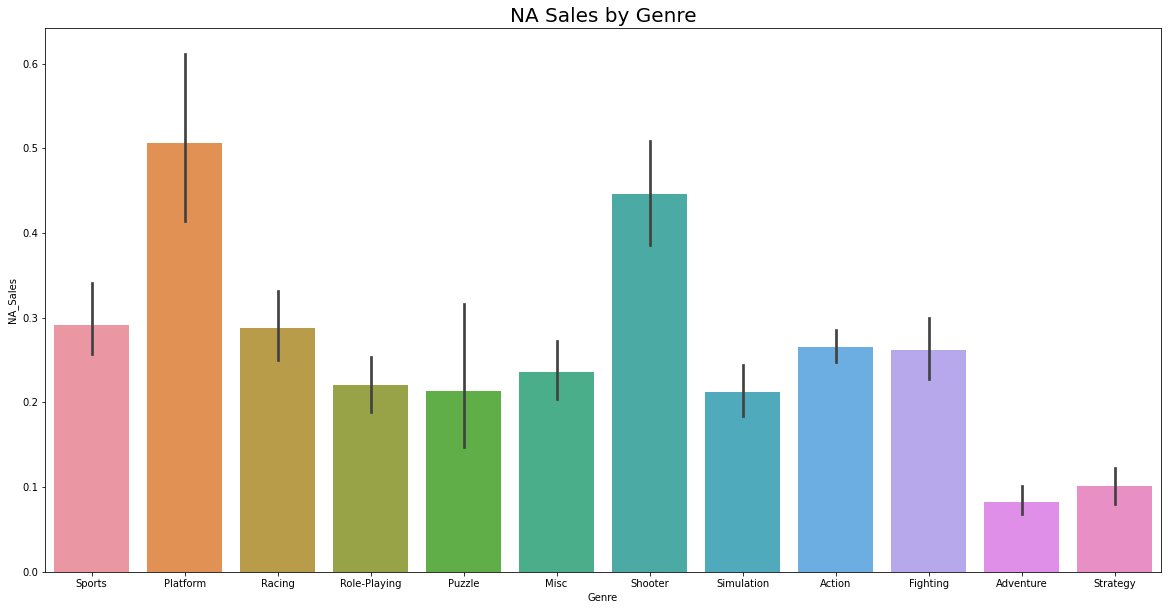

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Genre'], y=df['NA_Sales'])
plt.title('NA Sales by Genre', size=20)
plt.show()

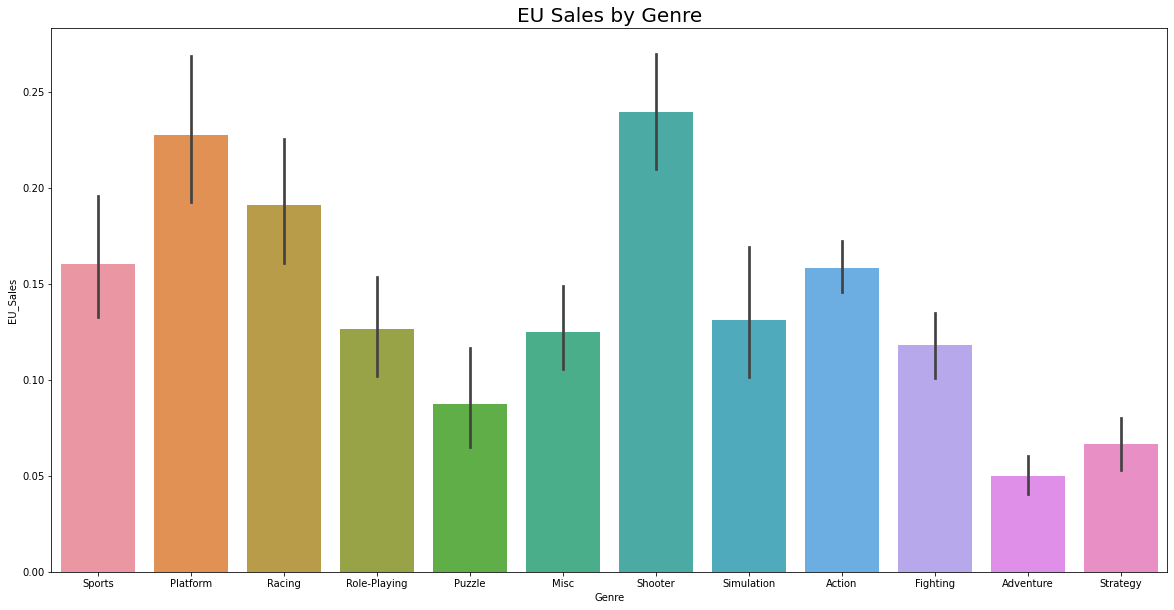

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Genre'], y=df['EU_Sales'])
plt.title('EU Sales by Genre', size=20)
plt.show()

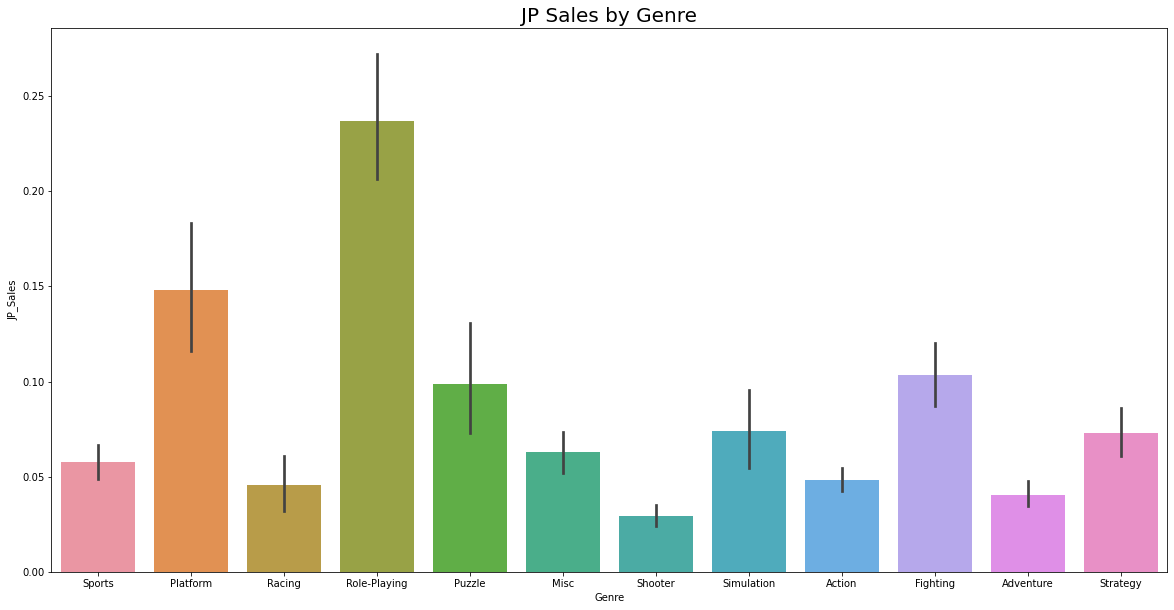

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Genre'], y=df['JP_Sales'])
plt.title('JP Sales by Genre', size=20)
plt.show()

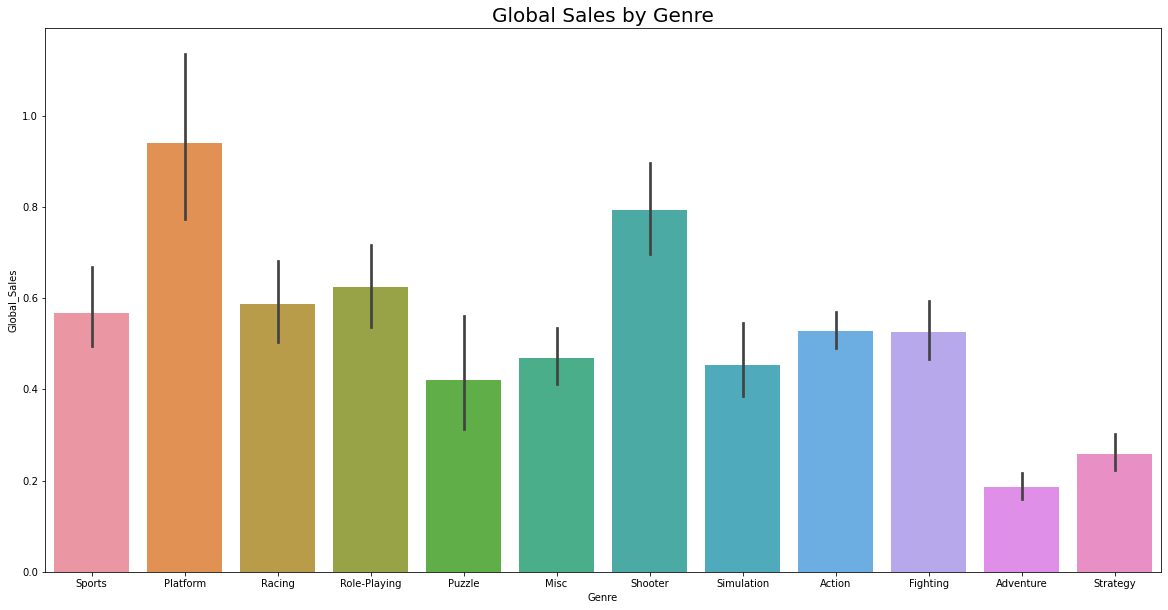

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Genre'], y=df['Global_Sales'])
plt.title('Global Sales by Genre', size=20)
plt.show()